# 1. Обработка данных

## 1.1 Подготовка библиотек и загрузка данных

In [1]:
# Загружаем библиотеки 
import pandas as pd
import numpy as np
 
!pip install hdfs
from hdfs import InsecureClient

In [2]:
# Загружаем csv-файл

client = InsecureClient('http://datalake:50070')

client.status("/")
fnames=client.list('/shared/SAPFinal270/')

fnames = [fnames[fnames.index('data for DI FInal (SAP Cloud Academy).csv')]]

data = pd.DataFrame()

for f in fnames:
   with client.read('/shared/SAPFinal270/' + f, encoding='utf-8') as reader:
    data_file = pd.read_csv(reader)
    data = pd.concat([data_file,data])

df = data
df.head(5)

,id,login,user,email,phone,region,potential_money_predict
0,4260145,fedor_2016,Виктория Афанасьевна Блохина,lavrenti_2010@rambler.ru,8 444 098 62 69,Ямало-Ненецкий АО,5877
1,5034710,vsevolod52,Данилова Глафира Юрьевна,kudrjashovaoksana@gmail.com,89263200568,респ. Карачаево-Черкесия,1936
2,492309,kim2017,Исакова Антонина Михайловна,ivan_24@hotmail.com,+7 (817) 308-77-28,Ханты-Мансийский АО,9167
3,3688593,sazonovserafim,Дарья Ильинична Егорова,ejudin@rambler.ru,+7 (726) 908-5426,Магаданская обл.,908
4,337579,oktjabrina59,Лыткин Сократ Тихонович,sidorovereme@yahoo.com,8 (830) 056-85-08,респ. Ингушетия,7366


## 1.2 Корректирока данных: столбец user

In [3]:
# Находим ФИО с лишними фразами посредством учета пробелов в данных (в стандартном случае 
# ФИО имеет 2 пробела между фразами: ФАМИЛИЯ (пробел) ИМЯ (пробел) ОТЧЕСТВО)
wrong_list = [i for i in list(df['user']) if (list(i).count(' ') != 2)]

# ПРИМЕРЫ НЕПРАВИЛЬНЫХ ДАННЫХ: г-жа Лазарева Лора Оскаровна, ывафывафывалдоф, 
# тов. Тихонов Мечислав Харламович и т.д. 

# Первые 10 неправильных ФИО из списка wrong_list
wrong_list[:10]

['г-жа Лазарева Лора Оскаровна',
 'ывафывафывалдоф',
 'тов. Комаров Иларион Ануфриевич',
 'тов. Сафонов Гордей Даниилович',
 'г-жа Фомина Антонина Дмитриевна',
 'тов. Гришин Доброслав Фролович',
 'тов. Романова Евгения Кузьминична',
 'тов. Колобова Феврония Анатольевна',
 'тов. Миронова Нонна Григорьевна',
 'г-жа Лобанова Лукия Богдановна']

In [4]:
# Убираем неправильно заполненные ФИО
df = df[df['user'].isin(wrong_list)== False].reset_index(drop = True)
df.head(5)

,id,login,user,email,phone,region,potential_money_predict
0,4260145,fedor_2016,Виктория Афанасьевна Блохина,lavrenti_2010@rambler.ru,8 444 098 62 69,Ямало-Ненецкий АО,5877
1,5034710,vsevolod52,Данилова Глафира Юрьевна,kudrjashovaoksana@gmail.com,89263200568,респ. Карачаево-Черкесия,1936
2,492309,kim2017,Исакова Антонина Михайловна,ivan_24@hotmail.com,+7 (817) 308-77-28,Ханты-Мансийский АО,9167
3,3688593,sazonovserafim,Дарья Ильинична Егорова,ejudin@rambler.ru,+7 (726) 908-5426,Магаданская обл.,908
4,337579,oktjabrina59,Лыткин Сократ Тихонович,sidorovereme@yahoo.com,8 (830) 056-85-08,респ. Ингушетия,7366


## 1.3 Корректирока данных: столбец email

In [5]:
# В столбце email имеются пустые значения

df[df['email'].isnull()].reset_index(drop=True).head(5)

,id,login,user,email,phone,region,potential_money_predict
0,2735928,dementi_39,Маргарита Харитоновна Михеева,NaN,+76093056386,Камчатский край,5119
1,3217843,nikanor_40,Василиса Викторовна Васильева,NaN,+7 406 226 34 05,Томская обл.,1071
2,6552667,sevastjankrjukov,Капустина Елизавета Оскаровна,NaN,+70560624927,респ. Марий-Эл,7437
3,7828391,pankrat84,Иванов Аполлинарий Аверьянович,NaN,8 460 234 9778,Курская обл.,2894
4,7225869,jdjachkov,Лидия Богдановна Бобылева,NaN,8 291 925 0173,респ. Тыва,4828


In [6]:
# Избавляемся от пустых значений (NaN)
df = df[~df['email'].isnull()].reset_index(drop=True)
df.head(5)

,id,login,user,email,phone,region,potential_money_predict
0,4260145,fedor_2016,Виктория Афанасьевна Блохина,lavrenti_2010@rambler.ru,8 444 098 62 69,Ямало-Ненецкий АО,5877
1,5034710,vsevolod52,Данилова Глафира Юрьевна,kudrjashovaoksana@gmail.com,89263200568,респ. Карачаево-Черкесия,1936
2,492309,kim2017,Исакова Антонина Михайловна,ivan_24@hotmail.com,+7 (817) 308-77-28,Ханты-Мансийский АО,9167
3,3688593,sazonovserafim,Дарья Ильинична Егорова,ejudin@rambler.ru,+7 (726) 908-5426,Магаданская обл.,908
4,337579,oktjabrina59,Лыткин Сократ Тихонович,sidorovereme@yahoo.com,8 (830) 056-85-08,респ. Ингушетия,7366


In [7]:
# Выявлние лишних дубликатов в столбце email
seen = set()
uniq = [x for x in list(df['email']) if x in seen or seen.add(x)]

# Создаем датафрейм, содержащий ошибочные дубликаты электронных почт
df_mistake = df[df['email'].isin(uniq)].sort_values(by = 'email')
df_mistake.head(5)

,id,login,user,email,phone,region,potential_money_predict
7487,4826595,moiseevkornil,Демьян Бориславович Савин,afinogen_1986@rambler.ru,+7 407 157 2622,респ. Адыгея,668
3056,85847,jaroslav_2000,Баранов Михей Борисович,afinogen_1986@rambler.ru,8 (477) 512-9697,респ. Тыва,1353
4632,1511287,mkrjukova,Лев Витальевич Фомичев,akarpov@yahoo.com,+7 130 877 9533,Томская обл.,7029
11092,6958405,rogovratmir,Горбачева Агафья Валериевна,akarpov@yahoo.com,8 (196) 619-92-70,Хабаровский край,4745
7745,8447573,gavrilovseliverst,Светлана Степановна Филиппова,akulina_1998@hotmail.com,80785378217,Челябинская обл.,2011


In [8]:
# Преполагаем, что созвонились с людьми и выявили правильность отнесения электронных почт к конкретным клиентам.
# Таким образом дубликатов электронных почт больше нет
df_solution = pd.concat([df_mistake[df_mistake['email'] == i].iloc[0] for i in df_mistake['email'].unique()],
                        axis = 1).T
df_solution.head(5)

,id,login,user,email,phone,region,potential_money_predict
7487,4826595,moiseevkornil,Демьян Бориславович Савин,afinogen_1986@rambler.ru,+7 407 157 2622,респ. Адыгея,668
4632,1511287,mkrjukova,Лев Витальевич Фомичев,akarpov@yahoo.com,+7 130 877 9533,Томская обл.,7029
7745,8447573,gavrilovseliverst,Светлана Степановна Филиппова,akulina_1998@hotmail.com,80785378217,Челябинская обл.,2011
4766,5563435,makar85,Белоусова Ирина Егоровна,anani14@mail.ru,8 934 665 52 06,Ненецкий АО,1895
2284,6981078,gurevkondrat,Прасковья Станиславовна Емельянова,anisimovluka@yahoo.com,+7 342 256 0044,Ямало-Ненецкий АО,6234


In [9]:
# Подстраиваем датафрейм под последние изменения
df = pd.concat([df[~df['email'].isin(uniq)], df_solution]).sort_values(by = 'id').reset_index(drop=True)
df.head(5)

,id,login,user,email,phone,region,potential_money_predict
0,11034,ignatovvelimir,Олимпиада Егоровна Наумова,boris2017@hotmail.com,8 828 347 0781,респ. Коми,9616
1,11211,bogdanorehov,Денисова Александра Рудольфовна,romanovuljan@yahoo.com,8 919 819 52 12,Волгоградская обл.,9005
2,11336,svjatopolk_2003,Лаврентьев Дмитрий Демидович,uljana1989@yandex.ru,+7 (043) 246-16-50,Владимирская обл.,8385
3,12048,jaroslavsavin,Клавдия Вениаминовна Полякова,lebedevizot@yandex.ru,+71126255492,респ. Удмуртия,1696
4,12926,bogdanovazhanna,Симонов Измаил Эдгарович,ignatovaaleksandra@yandex.ru,8 (161) 767-8303,респ. Удмуртия,6174


## 1.4 Корректирока данных: столбец phone

In [10]:
# Для отслеживания повторов воспользуемся теперь другим способом:
# cоздаем словарь в формате {'номер телефона': кол-во повторов в столбце 'phone'} и
# на базе этого находим ошибки

# Результат: повторяются фразы 'Не дам', 'Нет'
my_dict = {i:list(df['phone']).count(i) for i in list(df['phone'])}
df[df['phone'].isin([i for i in list(my_dict.keys()) if my_dict[i] > 1])].head(5)

,id,login,user,email,phone,region,potential_money_predict
1170,734017,juvenalimishin,Авксентий Устинович Рыбаков,danilovavksenti@hotmail.com,Не дам,респ. Коми,9225
1844,1123006,samsondjachkov,Бронислав Харлампьевич Ларионов,savva25@gmail.com,Нет,Алтайский край,1223
2570,1568670,egorovlukjan,Фролова Екатерина Феликсовна,sorokinermil@mail.ru,Нет,Ханты-Мансийский АО,6557
2725,1659270,eduard_79,Ярослав Гертрудович Корнилов,fokinaevfrosinija@yandex.ru,Нет,Забайкальский край,1699
3385,2049232,hlarionova,Спартак Анисимович Суханов,afinogen_07@rambler.ru,Нет,Тульская обл.,4062


In [11]:
# Убираем фразы 'Не дам', 'Нет' из столбца phone
df = df[~df['phone'].isin([i for i in list(my_dict.keys()) if my_dict[i] > 1])].reset_index(drop=True)
df.head(5)

,id,login,user,email,phone,region,potential_money_predict
0,11034,ignatovvelimir,Олимпиада Егоровна Наумова,boris2017@hotmail.com,8 828 347 0781,респ. Коми,9616
1,11211,bogdanorehov,Денисова Александра Рудольфовна,romanovuljan@yahoo.com,8 919 819 52 12,Волгоградская обл.,9005
2,11336,svjatopolk_2003,Лаврентьев Дмитрий Демидович,uljana1989@yandex.ru,+7 (043) 246-16-50,Владимирская обл.,8385
3,12048,jaroslavsavin,Клавдия Вениаминовна Полякова,lebedevizot@yandex.ru,+71126255492,респ. Удмуртия,1696
4,12926,bogdanovazhanna,Симонов Измаил Эдгарович,ignatovaaleksandra@yandex.ru,8 (161) 767-8303,респ. Удмуртия,6174


In [12]:
# Переводим все телефонные данные в удобный формат след. вида: +7 (xxx) xxx-xx-xx.

# Для этого сначала переводим все данные в безпробельный численный вид, не содержащий знаки '+' и '-'
# (примеры: 8 828 347 0781 => 88283470781, +7 (043) 246-16-50 => 70432461650 и т.д.)  
phone_number = [int(''.join(i for i in df['phone'].to_list()[i] if i.isdigit())) for i in range(len(df['phone'].to_list()))]

# Первые 10 преобразованных телефонов из списка phone_number
phone_number[:10]

[88283470781,
 89198195212,
 70432461650,
 71126255492,
 81617678303,
 80919099644,
 81939876162,
 74185803434,
 77345474983,
 81775338637]

In [13]:
# Переводим полученные данные в формат string
# (примеры: 88283470781 => '88283470781', 70432461650 => '70432461650' и т.д.)
phone_number_str = [str(i) for i in phone_number]

# Переводим все телефонные данные в формат +7(xxx)xxx-xx-xx
rebuild_tel_numbers = ['+7' +  '(' + phone_number_str[i][1:4] + ')' + phone_number_str[i][4:7] + '-' + phone_number_str[i][7:9] + '-' + phone_number_str[i][9:11] for i in range(len(phone_number_str))]

# Первые 10 преобразованных телефонов из списка rebuild_tel_numbers
rebuild_tel_numbers[:10]

['+7(828)347-07-81',
 '+7(919)819-52-12',
 '+7(043)246-16-50',
 '+7(112)625-54-92',
 '+7(161)767-83-03',
 '+7(091)909-96-44',
 '+7(193)987-61-62',
 '+7(418)580-34-34',
 '+7(734)547-49-83',
 '+7(177)533-86-37']

In [14]:
# Добавляем преобразованные номера в датафрейм
df['phone'] = rebuild_tel_numbers
df.head(5)

,id,login,user,email,phone,region,potential_money_predict
0,11034,ignatovvelimir,Олимпиада Егоровна Наумова,boris2017@hotmail.com,+7(828)347-07-81,респ. Коми,9616
1,11211,bogdanorehov,Денисова Александра Рудольфовна,romanovuljan@yahoo.com,+7(919)819-52-12,Волгоградская обл.,9005
2,11336,svjatopolk_2003,Лаврентьев Дмитрий Демидович,uljana1989@yandex.ru,+7(043)246-16-50,Владимирская обл.,8385
3,12048,jaroslavsavin,Клавдия Вениаминовна Полякова,lebedevizot@yandex.ru,+7(112)625-54-92,респ. Удмуртия,1696
4,12926,bogdanovazhanna,Симонов Измаил Эдгарович,ignatovaaleksandra@yandex.ru,+7(161)767-83-03,респ. Удмуртия,6174


## 1.5 Корректирока данных: остальные столбцы (дополнительно)

In [15]:
# Корректируем столбец 'login', так как у него есть ненужные дубликаты
# Находим дабликаты логинов
seen = set()
uniq1 = [x for x in list(df['login']) if x in seen or seen.add(x)] 

# Выводим дубликаты в виде датафрейм
df_mistake1 = df[df['login'].isin(uniq1)].sort_values(by = 'login')
df_mistake1.head(5)

,id,login,user,email,phone,region,potential_money_predict
10700,6650061,abramovflorentin,Суханов Антонин Гордеевич,porfirisisoev@hotmail.com,+7(344)586-95-33,Ямало-Ненецкий АО,8569
470,278916,abramovflorentin,Дмитрий Эдгардович Кудрявцев,mitofan_89@mail.ru,+7(135)040-91-25,Камчатский край,202
4562,2770760,adamvorontsov,Горшкова Юлия Феликсовна,mechislav1975@yahoo.com,+7(744)676-57-66,респ. Северная Осетия - Алания,1553
6852,4204688,adamvorontsov,Макаров Лукьян Гаврилович,rjurik2000@rambler.ru,+7(698)821-23-76,респ. Северная Осетия - Алания,7944
3389,2054440,adementev,Аксенов Платон Власович,vpopova@gmail.com,+7(631)753-66-40,Еврейская АО,7535


In [16]:
# Преполагаем, что созвонились с людьми и выявили правильность отнесения логинов к конкретным клиентам.
# Таким образом дубликатов электронных логинов больше нет       
df_solution1 = pd.concat([df_mistake1[df_mistake1['login'] == i].iloc[0] for i in df_mistake1['login'].unique()],
                        axis = 1).T
df_solution1.head(5)

,id,login,user,email,phone,region,potential_money_predict
10700,6650061,abramovflorentin,Суханов Антонин Гордеевич,porfirisisoev@hotmail.com,+7(344)586-95-33,Ямало-Ненецкий АО,8569
4562,2770760,adamvorontsov,Горшкова Юлия Феликсовна,mechislav1975@yahoo.com,+7(744)676-57-66,респ. Северная Осетия - Алания,1553
3389,2054440,adementev,Аксенов Платон Власович,vpopova@gmail.com,+7(631)753-66-40,Еврейская АО,7535
1052,651386,adrian_2015,Беляков Степан Васильевич,fadeevkir@gmail.com,+7(465)464-86-21,Архангельская обл.,6037
6368,3879073,afinogen_39,Белоусова Глафира Константиновна,sdenisova@yandex.ru,+7(001)723-79-14,Чукотский АО,5827


In [17]:
# Перестраиваем датафрейм таким образом, чтобы не было дубликатов логинов 
df = pd.concat([df[~df['login'].isin(list(df_solution1['login']))], 
                df_solution1]).sort_values(by = 'id').reset_index(drop =True)

# Выводим полностью обработанную таблицу
df.index = df['id']
df = df.iloc[:,1:]
df.head(5)

,login,user,email,phone,region,potential_money_predict
id,,,,,,
11034,ignatovvelimir,Олимпиада Егоровна Наумова,boris2017@hotmail.com,+7(828)347-07-81,респ. Коми,9616
11211,bogdanorehov,Денисова Александра Рудольфовна,romanovuljan@yahoo.com,+7(919)819-52-12,Волгоградская обл.,9005
11336,svjatopolk_2003,Лаврентьев Дмитрий Демидович,uljana1989@yandex.ru,+7(043)246-16-50,Владимирская обл.,8385
12048,jaroslavsavin,Клавдия Вениаминовна Полякова,lebedevizot@yandex.ru,+7(112)625-54-92,респ. Удмуртия,1696
12926,bogdanovazhanna,Симонов Измаил Эдгарович,ignatovaaleksandra@yandex.ru,+7(161)767-83-03,респ. Удмуртия,6174


# 1.6. Загружаем результаты в облачную папку посредством команды to_csv

In [18]:
df.to_csv('SAPClearData270.csv')

# 2. Анализ данных

## 2.1 Группируем данные по регионам и выводим суммарные клиентские затраты

In [19]:
# Группируем данные по регионам. Строим столбец с общими потенциальными 
# клиентскими затратами в регионах (sum)

df_region_group = df.groupby('region')['potential_money_predict'].agg(['sum']).sort_values(by = 'sum', ascending = False)
df_region_group

,sum
region,
Ненецкий АО,3779284
Чукотский АО,3643488
Еврейская АО,3620365
Ямало-Ненецкий АО,3508399
Ханты-Мансийский АО,3460823
...,...
Челябинская обл.,321262
Омская обл.,313699
Ростовская обл.,305267


## 2.2 Визуализируем результат

In [20]:
# Загружаем seaborn и matplotlib.pyplot
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Кол-во наблюдений
print('count:', len(df_region_group[['sum']]))
# Сумма
print('sum:', np.round(np.sum(df_region_group[['sum']])[0],5))
# Среднее значение
print('mean:', np.round(np.mean(df_region_group[['sum']])[0],5))
# Стандартное отклонение
print('std:', np.round(np.std(df_region_group[['sum']])[0],5))
# Минимальное значение
print('min:', np.round(np.min(df_region_group[['sum']])[0],5))
# Квантиль на уровне 25%
print('25% quantile:', np.round(np.quantile(df_region_group[['sum']],q=0.25),5))
# Квантиль на уровне 50%
print('50% quantile:', np.round(np.quantile(df_region_group[['sum']],q=0.5),5))
# Квантиль на уровне 75%
print('75% quantile:', np.round(np.quantile(df_region_group[['sum']],q=0.75),5))
# Максимальное значение
print('max:', np.round(np.max(df_region_group[['sum']])[0],5))

count: 82
sum: 70517892
mean: 859974.29268
std: 847831.64534
min: 299426
25% quantile: 367666.25
50% quantile: 437540.0
75% quantile: 840512.0
max: 3779284


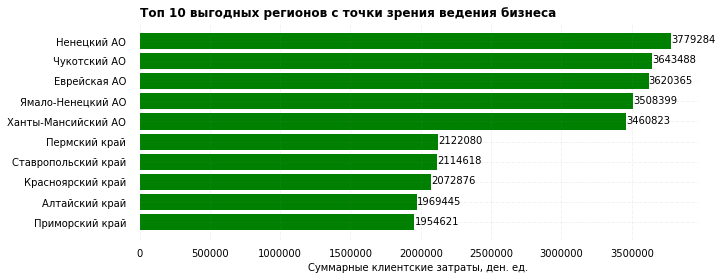

In [22]:
# Выводим топ 10 наиболее выгодных регионов с точки зрения ведения бизнеса

name = list(df_region_group.index)[:10]
price = list(df_region_group['sum'])[:10]
 
fig, ax = plt.subplots(figsize =(10, 4))
 
ax.barh(name, price,  color ='g')
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
ax.invert_yaxis()
 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10,  color ='k')
 
ax.set_title('Топ 10 выгодных регионов с точки зрения ведения бизнеса',
             loc ='left',color='k',fontweight ='bold')

ax.set_xlabel('Суммарные клиентские затраты, ден. ед.')

plt.ticklabel_format(axis="x", style='plain')
 
plt.show()

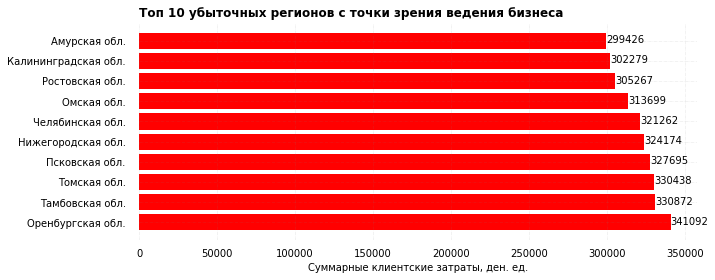

In [23]:
# Выводим топ 10 наиболее убыточных регионов с точки зрения ведения бизнеса

name = list(df_region_group.index)[-10:][::-1]
price = list(df_region_group['sum'])[-10:][::-1]
 
fig, ax = plt.subplots(figsize =(10, 4))
 
ax.barh(name, price,  color ='r')
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
ax.invert_yaxis()
 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10,  color ='k')
 
ax.set_title('Топ 10 убыточных регионов с точки зрения ведения бизнеса',
             loc ='left',color='k',fontweight ='bold')

ax.set_xlabel('Суммарные клиентские затраты, ден. ед.')
 
plt.ticklabel_format(axis="x", style='plain')

plt.show()

## 2.3 Загружаем результаты в облачную папку посредством команды to_csv

In [24]:
df_region_group.to_csv('SAPGroupedData270.csv')